In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import time
import logging
logging.basicConfig(level=logging.INFO)

import numpy as np
import matplotlib.pyplot as plt

In [4]:
import qcsapphire
import qt3rfsynthcontrol
import qt3utils.experiments.cwodmr
import qt3utils.nidaq

In [6]:
pulser = qcsapphire.Pulser('COM10')
rfsynth = qt3rfsynthcontrol.QT3SynthHD('COM5')

In [7]:
nidaq_config = qt3utils.nidaq.EdgeCounter('Dev1')

In [8]:
cwodmr = qt3utils.experiments.cwodmr.CWODMR(pulser, rfsynth, nidaq_config)

In [13]:
cwodmr.experimental_conditions()

{'freq_low': 2820000000.0,
 'freq_high': 2920000000.0,
 'freq_step': 1000000.0,
 'rf_power': -20,
 'rf_width': 5e-06,
 'clock_period': 2e-07}

In [26]:
cwodmr.freq_step = 1e6

In [27]:
scan_data = cwodmr.run()

INFO:qt3utils.experiments.cwodmr:RF frequency: 2820000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2821000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2822000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2823000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2824000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2825000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2826000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2827000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2828000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2829000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2830000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2831000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2832000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2833000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2834000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 28350000

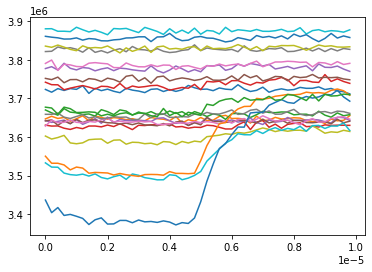

In [28]:
def plot_trace(trace, N_cycles=1, clock_rate=1):
    plt.plot(np.arange(len(trace)) / clock_rate, trace/N_cycles * clock_rate)
    
for scan in scan_data[::5]:
    plot_trace(scan[-1], cwodmr.N_cycles, clock_rate = 1./cwodmr.clock_period)

In [29]:
two_d_scan_data = np.array([scan[-1] for scan in scan_data])
signal = two_d_scan_data[:,:two_d_scan_data.shape[1]//4].mean(axis=1)
background = two_d_scan_data[:,two_d_scan_data.shape[1]//2:].mean(axis=1)

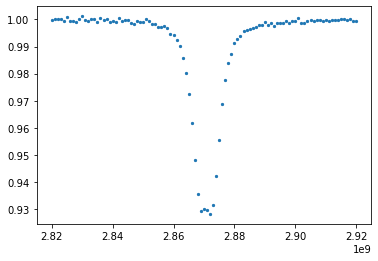

In [32]:
plt.scatter(np.array([scan[0] for scan in scan_data]), signal/background, s=5)

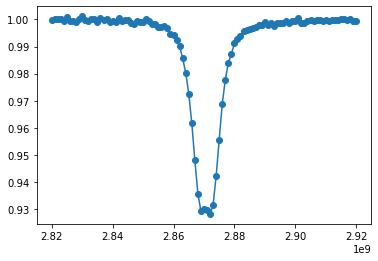

In [31]:
plt.plot(np.array([scan[0] for scan in scan_data]), signal/background, 'o-')